In [24]:
import sys
sys.path.append('/datasets/COCO-2017')
import test2017
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import glob

In [25]:
# Add official website of pytorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np
import matplotlib.pyplot as plt

In [35]:
import torch
import PIL
from torch.utils.data import Dataset
import os
import os.path as osp
import torchvision.transforms as transforms
from PIL import Image


def get_full_list(
    root_dir,
    base_dir,
#     extended_dir="COCO-2017/test2017",
):
    data_list = []
    for name in [base_dir]:
        data_dir = osp.join(
            root_dir, name
        )
        data_list += sorted(
            osp.join(data_dir, img_name) for img_name in
            filter(
                lambda x: x[-4:] == '.jpg',
                os.listdir(data_dir)
            )
        )
    return data_list

class COCO_DB(Dataset):
    def __init__(
        self,
        data_list
    ):
        self.data_list = data_list

    def __len__(self):
        return len(self.data_list)
                
    def __getitem__(self, i):
        # input and target images
        in_name = self.data_list[i]
        gt_name = self.data_list[i].replace('.jpg','.png')
    
        # process the images
        normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        transf = transforms.Compose([
            transforms.ToTensor(),
            normalize
        ])
        in_image = transf(
            Image.open(in_name).convert('RGB')
        )
        gt_im = Image.open(gt_name)
        
        gt_label = torch.LongTensor(
            np.frombuffer(gt_im.tobytes(), dtype=np.ubyte).reshape(
                in_image.shape[1:]
            )
        ) - 1

        return in_image, gt_label
    
    def revert_input(self, img, label):
        img = np.transpose(img.cpu().numpy(), (1, 2, 0))
        std_img = np.array([0.229, 0.224, 0.225]).reshape((1, 1, -1))
        mean_img = np.array([0.485, 0.456, 0.406]).reshape((1, 1, -1))
        img *= std_img
        img += mean_img
        label = label.cpu().numpy()
        return img, label + 1

# TRAIN_SIZE = 500
# VAL_SIZE = 30
# TEST_SIZE = 70
train_data_list = get_full_list("/datasets", "COCO-2017/train2017")
val_data_list = get_full_list("/datasets", "COCO-2017/val2017")
test_data_list = get_full_list("/datasets", "COCO-2017/test2017")


train_data_set = COCO_DB(train_data_list)
val_data_set = COCO_DB(val_data_list)
test_data_set = COCO_DB(test_data_list)

# val_data_set = CMP_Facade_DB(full_data_list[TRAIN_SIZE: TRAIN_SIZE + VAL_SIZE])
# test_data_set = CMP_Facade_DB(full_data_list[TRAIN_SIZE + VAL_SIZE:])

print("Training Set Size:", len(train_data_set))
print("Validation Set Size:", len(val_data_set))
print("Test Set Size:", len(test_data_set))

Training Set Size: 118287
Validation Set Size: 5000
Test Set Size: 40670


In [13]:
type(loader_train)

torch.utils.data.dataloader.DataLoader

- anno2017  test2017  train2017  unlabeled2017  val2017
- load the dataset (separte them out for test, train and val) look at the HW how its being done. 
- dataloader ^^^  / dataset class
- DeepLabv3 existing code/how to use existing trained dataset/model. 
- Figure out/step to implement A3 into this project.
- Gated Shape CNN (sudo code) 
- train, val, test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import PI

# 000000193977.jpg
idxs = [1, 2, 5, 6, 7, 8]
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 8))
for i, idx in enumerate(idxs):
    pic = plt.imread("dataset/base/cmp_b000{}.jpg".format(idx))
    label = plt.imread("dataset/base/cmp_b000{}.png".format(idx), format="PNG")

    axes[0][i].axis('off')
    axes[0][i].imshow(pic)
    axes[0][i].set_title("Raw Image")

    axes[1][i].imshow(label)
    axes[1][i].axis('off')
    axes[1][i].set_title("Ground Truth")

In [19]:
images = []
for f in glob.iglob('/datasets/COCO-2017/test2017/*'):
    print(f)
    images.append(np.asarray(Image.open(f)))
    break

images = np.array(images)
print(images.shape)


/datasets/COCO-2017/test2017/000000532113.jpg
(1, 426, 640, 3)


In [9]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

path_to_folder = "/datasets/COCO-2017/train2017/000000387657.jpg"
p = Image.open(str(path_to_folder)) 

plt.imshow(np.array(p))
# images = np.asarray()

# images = np.array(images)
# print(images.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/COCO-2017/train2017/000000387657.jpg'

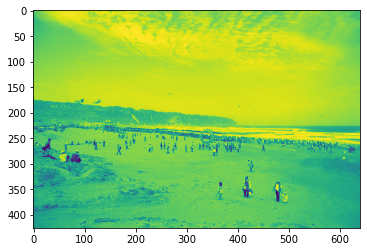

In [21]:
from PIL import Image, ImageOps
     

im1 = Image.open('/datasets/COCO-2017/test2017/000000532113.jpg')
 
# applying greyscale method
im2 = ImageOps.grayscale(im1)
 
plt.imshow(im2)

In [15]:
plt.imshow(((images[:,0])).reshape((426, 640)))

ValueError: cannot reshape array of size 1920 into shape (426,640)